In [23]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class
from scipy import interpolate

In [37]:
colors = ['red', 'orange', 'green', 'blue']
log10ztr_table = [2,3,4,5]
f_SIDM_table = [0.01, 0.03, 0.05, 0.1]
log10Gamma_table = [-5, -3, -1, 1]
omega_dcdm_table = np.linspace(0.01, 0.5, 10)
omega_dm_best = 0.12

In [25]:
common_settings_DCDM = {'omega_b':0.0223828,'100*theta_s':1.0399625783900215,
                   'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842,
                   'N_ur':2.046,'N_ncdm':1,'m_ncdm':0.06,'T_ncdm':0.7137658555036082,'YHe':'BBN',
                   'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0,'non linear':'halofit'}

common_settings_LCDM = {'omega_b':0.0223828, '100*theta_s':1.0399625783900215,
                   'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842,
                   'N_ur':2.046,'N_ncdm':1,'m_ncdm':0.06,'T_ncdm':0.7137658555036082,'YHe':'BBN',
                   'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0,'non linear':'halofit'}

We have omega_dcdm_ini = 0.11999998842168975 for omega_cdm = 0.12
We have omega_dcdm_ini = 0.11999998535454257 for omega_cdm = 0.12
We have omega_dcdm_ini = 0.11999998067965965 for omega_cdm = 0.12
We have omega_dcdm_ini = 0.11999998698584258 for omega_cdm = 0.12


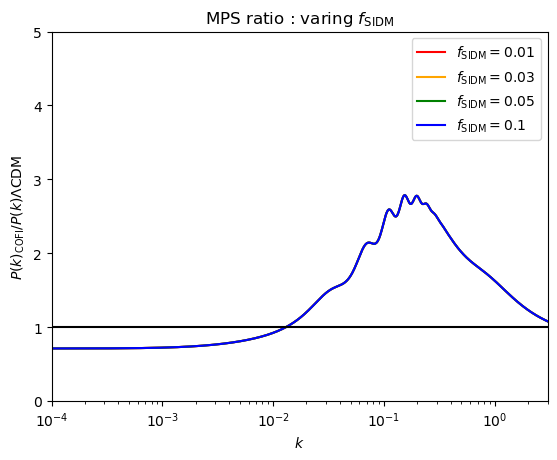

In [29]:
fig, ax = plt.subplots()
kk = np.logspace(-4, np.log10(3), 1000)

for i in range(4):
    f = f_SIDM_table[i]
    x = []
    y = []
    for omega in omega_dcdm_table:
        COFI = Class()
        COFI.set(common_settings_DCDM)
        COFI.set({'omega_ini_dr': omega*f/(1-f),'omega_ini_dcdm': omega ,'Gamma_dcdm': 1e-1, 'a_tr':1/(1+10000)})
        COFI.compute()
        back = COFI.get_background()
        omega_cdm_COFI = (back['(.)rho_dcdm'] + back['(.)rho_dr'])/back['(.)rho_crit']
        omega_cdm = omega_cdm_COFI[-1]*(COFI.h()**2)
        x.append(omega)
        y.append(omega_cdm)
        
    interpolation = interpolate.interp1d(y, x)
    omega = interpolation(omega_dm_best)
    
    COFI = Class()
    COFI.set(common_settings_DCDM)
    COFI.set({'omega_ini_dr': omega*f/(1-f),'omega_ini_dcdm': omega ,'Gamma_dcdm': 1e-1, 'a_tr':1/(1+10000)})
    COFI.compute()
        
    LCDM = Class()
    LCDM.set(common_settings_LCDM)
    LCDM.set({'omega_cdm' : omega_dm_best})
    LCDM.compute()

    MPS_COFI = np.array([COFI.pk(k, 0) for k in kk])
    MPS_LCDM = np.array([LCDM.pk(k, 0) for k in kk])
    
    ax.plot(kk, MPS_COFI/MPS_LCDM, color = colors[i], label = r'$f_{\mathrm{SIDM}}=$'+'{}'.format(f_SIDM_table[i]))
    print("We have omega_dcdm_ini = {} for omega_cdm = {}".format(omega, omega_dm_best))
    
ax.set_xlim(1e-4, 3)
ax.set_ylim(0, 5)
ax.set_xscale('log')
ax.legend(loc = 0)
ax.hlines(1, 1e-4, 3, color = 'k')
ax.set_title(r'MPS ratio : varing $f_{\mathrm{SIDM}}$')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$P(k)_{\mathrm{COFI}}/P(k){\Lambda\mathrm{CDM}}$')

fig.savefig("MPS_f.pdf")
        

We have omega_dcdm_ini = 0.1200098997204682 for omega_cdm = 0.12
We have omega_dcdm_ini = 0.12000025267087822 for omega_cdm = 0.12
We have omega_dcdm_ini = 0.11999999124230357 for omega_cdm = 0.12
We have omega_dcdm_ini = 0.11999998709929229 for omega_cdm = 0.12


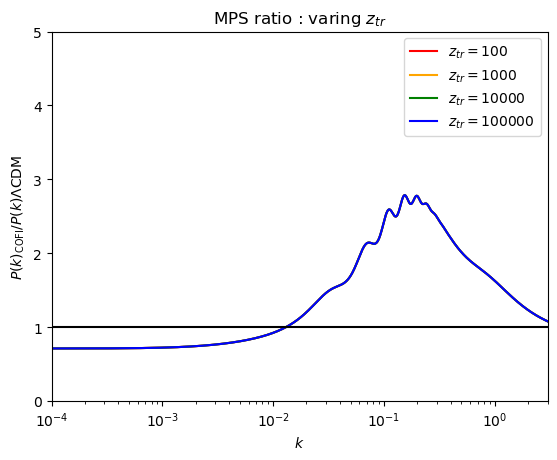

In [36]:
fig, ax = plt.subplots()
kk = np.logspace(-4, np.log10(3), 1000)

for i in range(4):
    z = 10**log10ztr_table[i]
    x = []
    y = []
    for omega in omega_dcdm_table:
        COFI = Class()
        COFI.set(common_settings_DCDM)
        COFI.set({'omega_ini_dr': 1,'omega_ini_dcdm': omega ,'Gamma_dcdm': 1e1, 'a_tr':1/(1+z)})
        COFI.compute()
        back = COFI.get_background()
        omega_cdm_COFI = (back['(.)rho_dcdm'] + back['(.)rho_dr'])/back['(.)rho_crit']
        omega_cdm = omega_cdm_COFI[-1]*(COFI.h()**2)
        x.append(omega)
        y.append(omega_cdm)

    interpolation = interpolate.interp1d(y, x)
    omega = interpolation(omega_dm_best)

    COFI = Class()
    COFI.set(common_settings_DCDM)
    COFI.set({'omega_ini_dr': 1,'omega_ini_dcdm': omega ,'Gamma_dcdm': 1e1, 'a_tr':1/(1+z)})
    COFI.compute()
        
    LCDM = Class()
    LCDM.set(common_settings_LCDM)
    LCDM.set({'omega_cdm' : omega_dm_best})
    LCDM.compute()

    MPS_COFI = np.array([COFI.pk(k, 0) for k in kk])
    MPS_LCDM = np.array([LCDM.pk(k, 0) for k in kk])
    
    ax.plot(kk, MPS_COFI/MPS_LCDM, color = colors[i], label = r'$z_{tr}=$'+'{}'.format(10**log10ztr_table[i]))
    print("We have omega_dcdm_ini = {} for omega_cdm = {}".format(omega, omega_dm_best))
    
ax.set_xlim(1e-4, 3)
ax.set_ylim(0, 5)
ax.set_xscale('log')
ax.legend(loc = 0)
ax.hlines(1, 1e-4, 3, color = 'k')
ax.set_title(r'MPS ratio : varing $z_{tr}$')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$P(k)_{\mathrm{COFI}}/P(k){\Lambda\mathrm{CDM}}$')

fig.savefig("MPS_ztr.pdf")

We have omega_dcdm_ini = 0.11999998884026586 for omega_cdm = 0.12
We have omega_dcdm_ini = 0.11999998893128165 for omega_cdm = 0.12
We have omega_dcdm_ini = 0.11999998895306375 for omega_cdm = 0.12
We have omega_dcdm_ini = 0.11999999124230357 for omega_cdm = 0.12


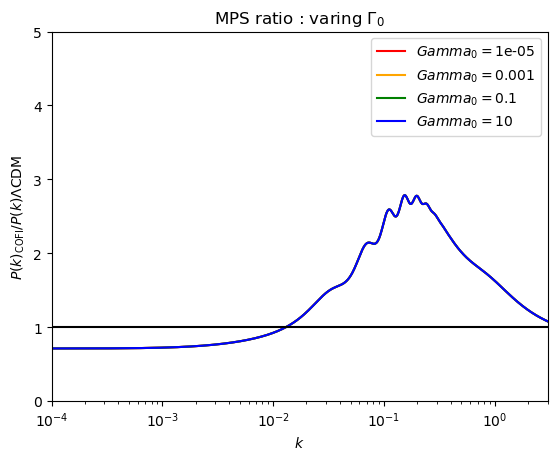

In [38]:
fig, ax = plt.subplots()
kk = np.logspace(-4, np.log10(3), 1000)

for i in range(4):
    Gamma = 10**log10Gamma_table[i]
    x = []
    y = []
    for omega in omega_dcdm_table:
        COFI = Class()
        COFI.set(common_settings_DCDM)
        COFI.set({'omega_ini_dr': 1,'omega_ini_dcdm': omega ,'Gamma_dcdm': Gamma, 'a_tr':1/(1+10000)})
        COFI.compute()
        back = COFI.get_background()
        omega_cdm_COFI = (back['(.)rho_dcdm'] + back['(.)rho_dr'])/back['(.)rho_crit']
        omega_cdm = omega_cdm_COFI[-1]*(COFI.h()**2)
        x.append(omega)
        y.append(omega_cdm)

    interpolation = interpolate.interp1d(y, x)
    omega = interpolation(omega_dm_best)

    COFI = Class()
    COFI.set(common_settings_DCDM)
    COFI.set({'omega_ini_dr': 1,'omega_ini_dcdm': omega ,'Gamma_dcdm': Gamma, 'a_tr':1/(1+10000)})
    COFI.compute()
        
    LCDM = Class()
    LCDM.set(common_settings_LCDM)
    LCDM.set({'omega_cdm' : omega_dm_best})
    LCDM.compute()

    MPS_COFI = np.array([COFI.pk(k, 0) for k in kk])
    MPS_LCDM = np.array([LCDM.pk(k, 0) for k in kk])
    
    ax.plot(kk, MPS_COFI/MPS_LCDM, color = colors[i], label = r'$Gamma_0=$'+'{}'.format(10**log10Gamma_table[i]))
    print("We have omega_dcdm_ini = {} for omega_cdm = {}".format(omega, omega_dm_best))
    
ax.set_xlim(1e-4, 3)
ax.set_ylim(0, 5)
ax.set_xscale('log')
ax.legend(loc = 0)
ax.hlines(1, 1e-4, 3, color = 'k')
ax.set_title(r'MPS ratio : varing $\Gamma_0$')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$P(k)_{\mathrm{COFI}}/P(k){\Lambda\mathrm{CDM}}$')

fig.savefig("MPS_Gamma.pdf")

KeyboardInterrupt: 

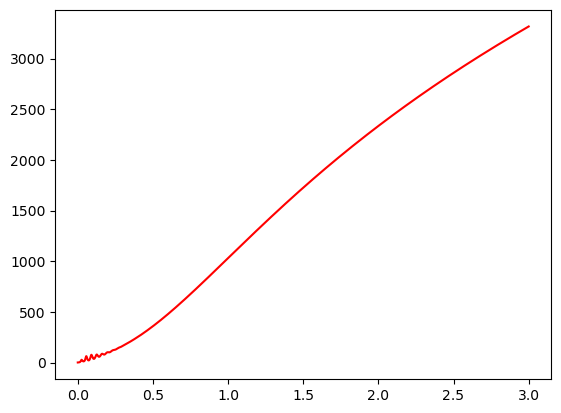

In [13]:
fig, ax = plt.subplots()
kk = np.logspace(-4, np.log10(3), 1000)

for i in range(4):
    omega_ini_dcdm = omega_dcdm_table[i]
    COFI = Class()
    COFI.set(common_settings_DCDM)
    COFI.set({'omega_ini_dr': 0.1,'omega_ini_dcdm': omega_ini_dcdm ,'Gamma_dcdm': 1e-1, 'a_tr':1/(1+10000)})
    COFI.compute()
    back = COFI.get_background()
    omega_cdm_LCDM = (back['(.)rho_dcdm'] + back['(.)rho_dr'])/back['(.)rho_crit']
    LCDM = Class()
    LCDM.set(common_settings_LCDM)
    LCDM.set({'omega_cdm' : omega_cdm_LCDM[-1]})
    LCDM.compute()

    MPS_COFI = np.array([COFI.pk(k, 0) for k in kk])
    MPS_LCDM = np.array([LCDM.pk(k, 0) for k in kk])
    
    ax.plot(kk, MPS_COFI/MPS_LCDM, color = colors[i], label = r'$\omega_{dcdm, ini}=$'+'{}'.format(omega_ini_dcdm))
    
ax.set_xlim(1e-4, 3)
ax.set_ylim(0, 5)
ax.set_xscale('log')
ax.legend(loc = 0)
ax.hlines(1, 1e-4, 3, color = 'k')
ax.set_title(r'MPS ratio : varing $\omega_{dcdm, ini}$')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$P(k)_{\mathrm{COFI}}/P(k){\Lambda\mathrm{CDM}}$')

fig.savefig("MPS_f.pdf")

In [17]:
rho_cdm = back['(.)rho_cdm']
rho_dcdm = back['(.)rho_dcdm']
rho_dr = back['(.)rho_dr']
z = back['z']
a = 1/(1+z)

/var/folders/hb/f8g3yv1s0xgcyvrf_6rd_qnc0000gn/T/ipykernel_11143/4186252256.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 0)


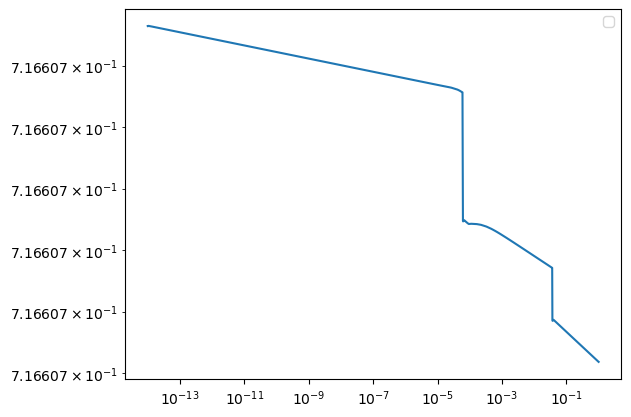

In [20]:
#plt.plot(a, rho_cdm, label = "CDM")
#plt.plot(a, rho_dcdm, label = "DCDM")
#plt.plot(a, rho_dr, label = "DR")
#plt.plot(a, rho_dcdm + rho_dr , label = "DCDM+DR")
plt.plot(a, rho_cdm/rho_dcdm)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc = 0)

In [ ]:
omega_cdm_COFI[-1]

In [9]:
omega_cdm_COFI

array([2.65580494e-11, 2.65773206e-11, 2.65966073e-11, ...,
       3.65014625e-01, 3.64759262e-01, 3.64503639e-01])

In [14]:
COFI.h()

0.6418154103005632